In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from plotnine import *

In [64]:
# matplotlib 한글설정

import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
    rc('font',family=font_name)
else:
    rc('font',family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False

## 서울시 그리드화 온도-토지피복

In [4]:
os.chdir('.\\그리드화')

In [12]:
tmps = pd.read_csv('그리드화_온도.csv')
grounds = pd.read_csv('그리드화_표지피복.csv')

In [14]:
tmp = tmp.loc[:,['fid','DN']]
ground = grounds.loc[:,['fid_2','UCB','area']]

In [23]:
fids = list(tmp.fid.unique())
# tmp: fid(그리드)마다 DN(온도)의 max / min / avg 값을 얻자
fid_ls, avg_tmp_ls, max_tmp_ls, min_tmp_ls = [], [], [], []
for fid in fids:
    df = tmp.loc[tmp.fid == fid,:].reset_index(drop=True)
    fid_ls.append(fid)
    avg_tmp_ls.append(np.mean(df.DN))
    min_tmp_ls.append(np.min(df.DN))
    max_tmp_ls.append(np.max(df.DN))
tmp_final = pd.DataFrame({'fid':fid_ls,'avg_tmp':avg_tmp_ls,'max_tmp':max_tmp_ls,'min_tmp':min_tmp_ls})
tmp_final

,fid,avg_tmp,max_tmp,min_tmp
0,415,25.200000,27,24
1,416,26.000000,27,25
2,412,25.857143,27,25
3,444,20.015152,28,13
4,445,20.704545,27,13
5,414,31.307692,35,27
6,443,28.076923,32,25
7,413,26.888889,29,26
8,411,32.066667,36,28
9,396,25.555556,27,24


In [38]:
fids = list(tmp.fid.unique())
# ground: fid(그리드)마다 UCB의 area 더하고 비율 보기
ucbs = list(ground.UCB.unique())
CDS = {}
CDS['fid'] = []
for ucb in ucbs:
    CDS[ucb] = []

for fid in fids:
    df = ground.loc[ground.fid_2 == fid,:].reset_index(drop=True)
    CDS['fid'].append(fid)
    ucb_o = list(df.UCB.unique())
    for ucb in ucb_o:
        ucb_area = np.sum(df.loc[df.UCB == ucb,'area'].values)
        CDS[ucb].append(ucb_area)
            
    ucb_x = list(set(ucbs) - set(ucb_o))
    if len(ucb_x) > 0:
        for ucb in ucb_x:
            CDS[ucb].append(0)
    else:
        pass
final_ground = pd.concat([pd.Series(CDS[col]) for col in list(CDS.keys())],axis=1)
final_ground.columns = list(CDS.keys())
final_ground
    

,fid,3130,3210,3110,3430,2330,3440,3140,4210,3120,...,2120,1110,2220,3220,2310,2230,3550,2320,1220,3530
0,415,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0
1,416,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0
2,412,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0
3,444,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0
4,445,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0
5,414,24714.695,2432519.648,104145.610,13218.085,90912.461,0.000,7040.017,7473.982,0.000,...,0.0,0.0,0.000,48854.326,0.0,0.000,0.000,0.00,0.000,0.0
6,443,0.000,2432519.648,101179.265,0.000,0.000,0.000,76290.195,0.000,0.000,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0
7,413,0.000,0.000,0.000,0.000,65855.164,0.000,0.000,0.000,0.000,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0
8,411,71944.339,2432519.648,582440.743,85827.224,0.000,33041.289,133353.494,158660.211,282337.592,...,0.0,0.0,0.000,48854.326,0.0,0.000,0.000,0.00,0.000,0.0
9,396,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1823.279,0.000,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0


In [42]:
# final_ground.columns = ['fid',  3130,  3210,  3110,  3430,
#                         2330,  3440,  3140,  4210,  3120,
#                         3310,  2210,  2340,  1120,  1210,
#                         3420,  4310,  2110,  3410,  3320,
#                         2120,  1110,  2220,  3220,  2310,
#                         2230,  3550,  2320,  1220,  3530]

final_ground.columns = ['fid',  '상업/업무지(도시)','도로(도시)','일반주택지(도시)','교육/군사시설(도시)',
                        '유원지(임지)','공공용지(도시)','인공녹지(도시)','하천(수계)','고층주택지(도시)',
                        '공업시설(도시)','침엽수림(임지)','암벽/석산(임지)','미경지정리답(농지)','보통/특수작물(농지)',
                        '처리장(도시)','저수지/늪(수계)','자연초지(임지)','발전시설(도시)','공업나지(도시)',
                        '인공초지(임지)','경지정리답(농지)','활엽수림(임지)','철로(도시)','골프장(임지)',
                        '혼합수림(임지)','가축/사육시설(도시)','공원묘지(임지)','과수원(농지)','매립지(도시)']

final_ground

,fid,상업/업무지(도시),도로(도시),일반주택지(도시),교육/군사시설(도시),유원지(임지),공공용지(도시),인공녹지(도시),하천(수계),고층주택지(도시),...,인공초지(임지),경지정리답(농지),활엽수림(임지),철로(도시),골프장(임지),혼합수림(임지),가축/사육시설(도시),공원묘지(임지),과수원(농지),매립지(도시)
0,415,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0
1,416,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0
2,412,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0
3,444,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0
4,445,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0
5,414,24714.695,2432519.648,104145.610,13218.085,90912.461,0.000,7040.017,7473.982,0.000,...,0.0,0.0,0.000,48854.326,0.0,0.000,0.000,0.00,0.000,0.0
6,443,0.000,2432519.648,101179.265,0.000,0.000,0.000,76290.195,0.000,0.000,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0
7,413,0.000,0.000,0.000,0.000,65855.164,0.000,0.000,0.000,0.000,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0
8,411,71944.339,2432519.648,582440.743,85827.224,0.000,33041.289,133353.494,158660.211,282337.592,...,0.0,0.0,0.000,48854.326,0.0,0.000,0.000,0.00,0.000,0.0
9,396,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1823.279,0.000,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0


In [43]:
final_ground['shape_area'] = [np.sum(final_ground.iloc[i,1:].values) for i in range(len(final_ground))]

In [44]:
final_ground2 = final_ground.copy()
feats = list(final_ground.columns[1:-1])
for f in feats:
    final_ground2['{}_비율'.format(f)] = [(final_ground2[f][i]/final_ground2.shape_area[i])*100 for i in range(len(final_ground2))]
final_ground2

,fid,상업/업무지(도시),도로(도시),일반주택지(도시),교육/군사시설(도시),유원지(임지),공공용지(도시),인공녹지(도시),하천(수계),고층주택지(도시),...,인공초지(임지)_비율,경지정리답(농지)_비율,활엽수림(임지)_비율,철로(도시)_비율,골프장(임지)_비율,혼합수림(임지)_비율,가축/사육시설(도시)_비율,공원묘지(임지)_비율,과수원(농지)_비율,매립지(도시)_비율
0,415,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,416,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,412,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,444,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,445,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
5,414,24714.695,2432519.648,104145.610,13218.085,90912.461,0.000,7040.017,7473.982,0.000,...,0.0,0.0,0.000000,0.260098,0.0,0.000000,0.000000,0.000000,0.000000,0.0
6,443,0.000,2432519.648,101179.265,0.000,0.000,0.000,76290.195,0.000,0.000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
7,413,0.000,0.000,0.000,0.000,65855.164,0.000,0.000,0.000,0.000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
8,411,71944.339,2432519.648,582440.743,85827.224,0.000,33041.289,133353.494,158660.211,282337.592,...,0.0,0.0,0.000000,0.242726,0.0,0.000000,0.000000,0.000000,0.000000,0.0
9,396,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1823.279,0.000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0


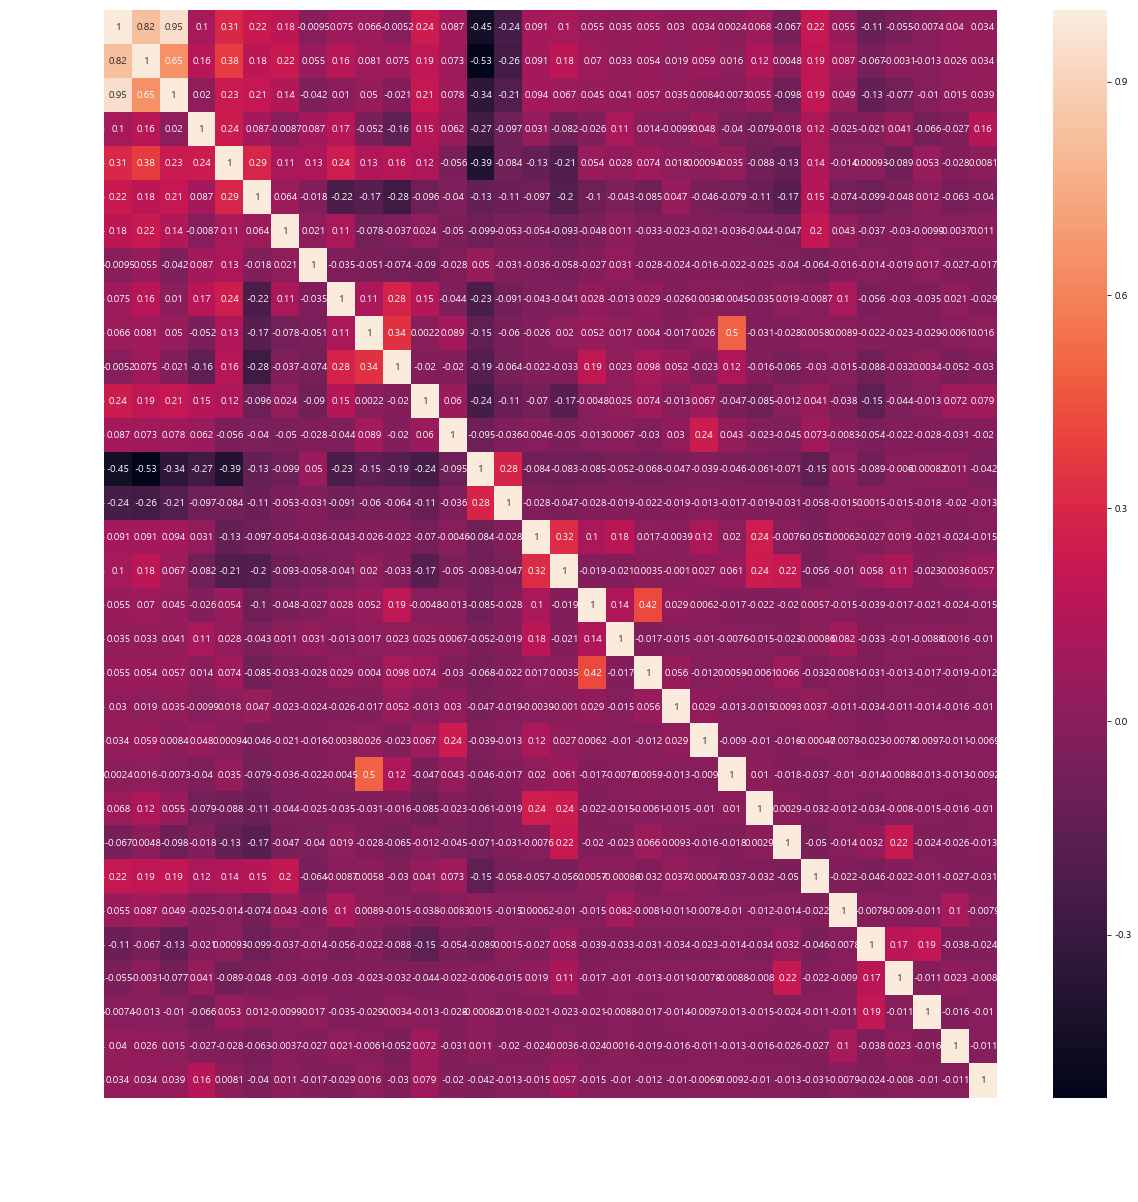

In [46]:
# final_ground와 tmp의 corr
DF1 = pd.merge(tmp_final,final_ground,on='fid')
corr = DF1.iloc[:,1:-1].corr()
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
sns.heatmap(corr,annot=True)
ax.tick_params(axis='x',colors='white')
ax.tick_params(axis='y',colors='white')
plt.show()

In [50]:
DF2 = pd.merge(final_ground2,tmp_final,on='fid')
DF2.columns[31:]

Index(['상업/업무지(도시)_비율', '도로(도시)_비율', '일반주택지(도시)_비율', '교육/군사시설(도시)_비율',
       '유원지(임지)_비율', '공공용지(도시)_비율', '인공녹지(도시)_비율', '하천(수계)_비율', '고층주택지(도시)_비율',
       '공업시설(도시)_비율', '침엽수림(임지)_비율', '암벽/석산(임지)_비율', '미경지정리답(농지)_비율',
       '보통/특수작물(농지)_비율', '처리장(도시)_비율', '저수지/늪(수계)_비율', '자연초지(임지)_비율',
       '발전시설(도시)_비율', '공업나지(도시)_비율', '인공초지(임지)_비율', '경지정리답(농지)_비율',
       '활엽수림(임지)_비율', '철로(도시)_비율', '골프장(임지)_비율', '혼합수림(임지)_비율',
       '가축/사육시설(도시)_비율', '공원묘지(임지)_비율', '과수원(농지)_비율', '매립지(도시)_비율', 'avg_tmp',
       'max_tmp', 'min_tmp'],
      dtype='object')

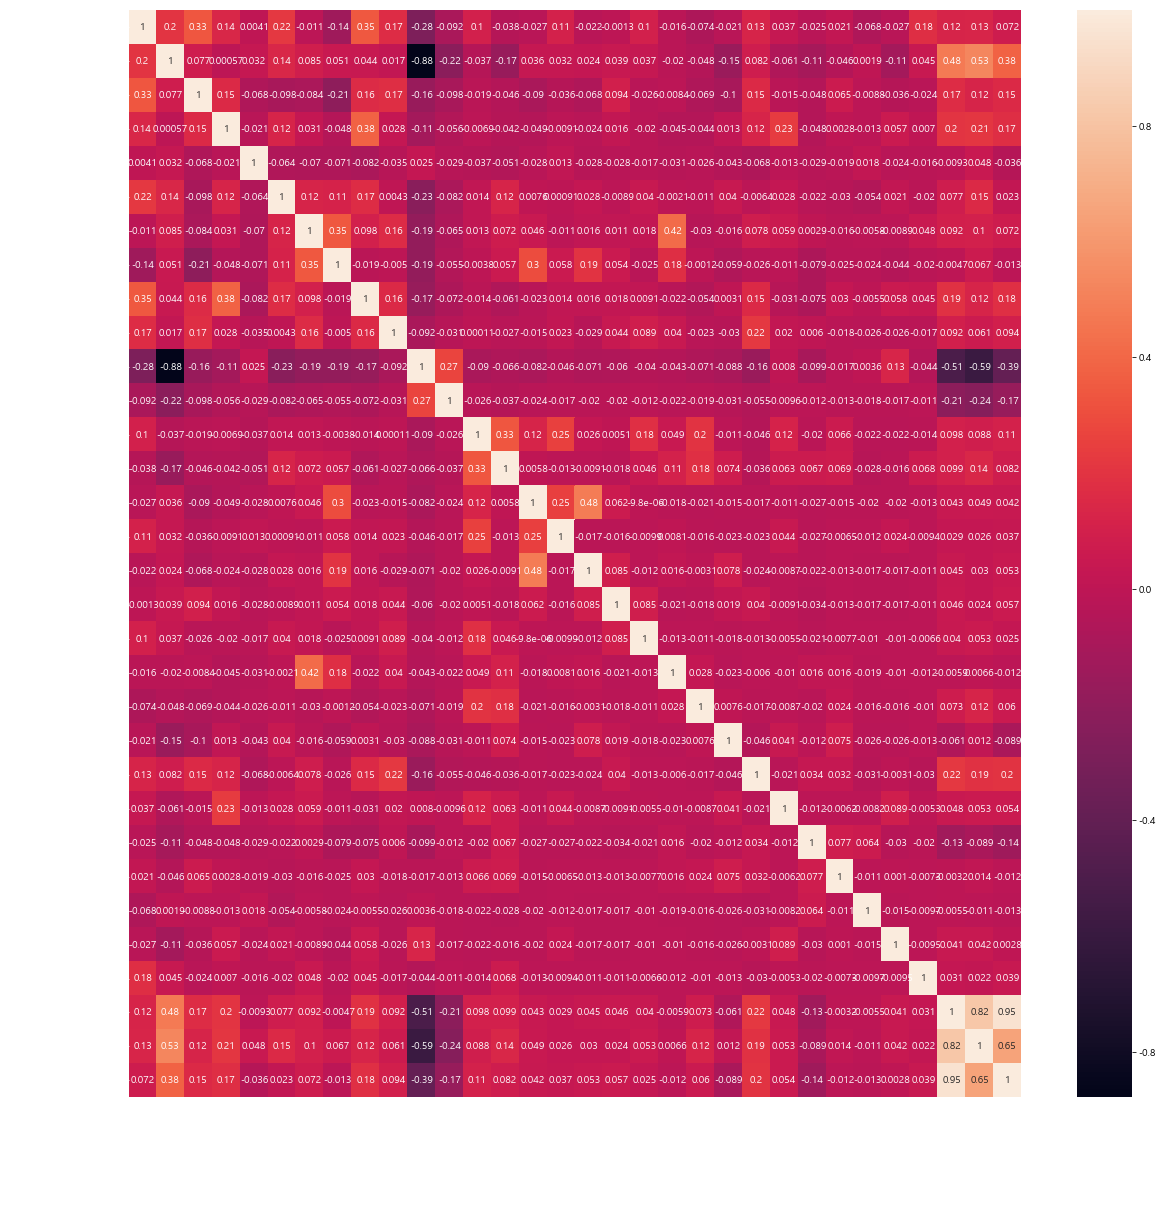

In [70]:
# final_ground2와 tmp의 corr
DF2 = pd.merge(final_ground2,tmp_final,on='fid')
corr = DF2.iloc[:,31:].corr()
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
sns.heatmap(corr,annot=True)
ax.tick_params(axis='x',colors='white')
ax.tick_params(axis='y',colors='white')
plt.show()

In [56]:
DF1.to_csv('그리드_토지피복_정리.csv',index=False)

In [55]:
DF2 = pd.merge(tmp_final,final_ground2,on='fid')
DF2.to_csv('그리드_토지피복_비율포함.csv',index=False)

### 시각화

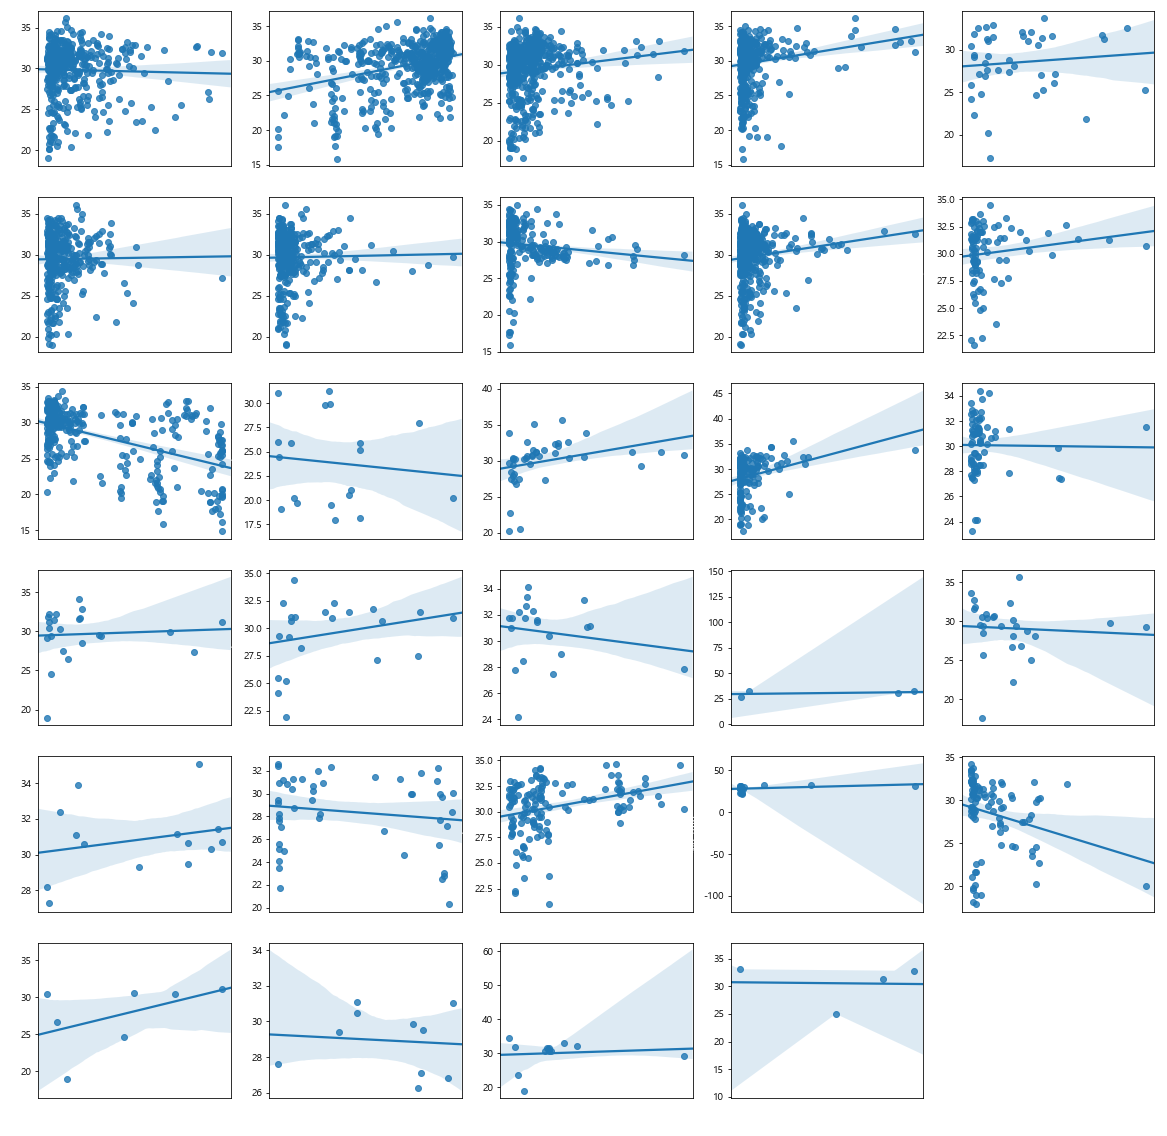

In [87]:
# avg_tmp
DF3 = DF2.iloc[:,31:]
fig = plt.figure(figsize=(20,20))
for i in range(len(DF3.columns)-3):
    vari = DF3.columns[i]
    df = DF3.loc[DF3[vari] > 0,:]
    ax= fig.add_subplot(6,int((len(DF3.columns)-3)/6)+1,i+1)
    sns.regplot(x=vari,y='avg_tmp',data=df)
    ax.tick_params(axis='x',colors='white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
plt.show()

In [12]:
# 파일 병합
wind = pd.read_csv('풍속.csv')
ground = pd.read_csv('그리드_토지피복_비율포함.csv')
water = pd.read_csv('토양배수.csv')

In [7]:
fids = list(water.fid.unique())
fid_ls = []
pu_posi = []
pu_nega = []
posi_ra = []
nega_ra = []
for fid in fids:
    fid_ls.append(fid)
    po_area = np.sum(water.loc[water.fid == fid,['매우양호','양호','약간양호']].values)
    ne_area = np.sum(water.loc[water.fid == fid,['매우불량','불량','약간불량']].values)
    all_area = water.loc[water.fid == fid,'총면적'].values[0]
    pu_posi.append(po_area)
    pu_nega.append(ne_area)
    posi_ra.append((po_area/all_area)*100)
    nega_ra.append((ne_area/all_area)*100)

water_final = pd.DataFrame({'fid':fid_ls,'순수양호':pu_posi,'순수불량':pu_nega,'순수양호_비율':posi_ra,'순수불량_비율':nega_ra})
water_final

,fid,순수양호,순수불량,순수양호_비율,순수불량_비율
0,1,151192.022,920992.235,14.101310,85.898690
1,2,735582.266,219892.248,76.986069,23.013931
2,3,939750.093,74802.088,92.627083,7.372917
3,4,834528.013,222763.284,78.930756,21.069244
4,5,684721.628,432106.192,61.309507,38.690493
5,6,47567.128,1024608.924,4.436503,95.563497
6,7,436846.417,634695.204,40.768031,59.231969
7,8,877591.213,179574.254,83.013610,16.986390
8,9,88221.383,983066.033,8.235081,91.764919
9,10,32767.544,1083749.195,2.934801,97.065199


In [9]:
df1 = pd.merge(water_final,wind[['fid','80m_wind_speed','10m_wind_speed','difference_wind']],on='fid')
df1

,fid,순수양호,순수불량,순수양호_비율,순수불량_비율,80m_wind_speed,10m_wind_speed,difference_wind
0,1,151192.022,920992.235,14.101310,85.898690,3.13,2.72,0.41
1,2,735582.266,219892.248,76.986069,23.013931,3.45,2.81,0.64
2,3,939750.093,74802.088,92.627083,7.372917,3.56,3.13,0.43
3,4,834528.013,222763.284,78.930756,21.069244,3.43,2.93,0.50
4,5,684721.628,432106.192,61.309507,38.690493,3.29,2.88,0.41
5,6,47567.128,1024608.924,4.436503,95.563497,3.16,2.77,0.39
6,7,436846.417,634695.204,40.768031,59.231969,3.13,2.81,0.32
7,8,877591.213,179574.254,83.013610,16.986390,3.35,3.05,0.30
8,9,88221.383,983066.033,8.235081,91.764919,3.64,2.96,0.68
9,10,32767.544,1083749.195,2.934801,97.065199,3.64,2.98,0.66


In [48]:
feats = ['fid','avg_tmp','max_tmp','min_tmp','상업/업무지(도시)_비율', '도로(도시)_비율', '일반주택지(도시)_비율', '교육/군사시설(도시)_비율',
       '유원지(임지)_비율', '공공용지(도시)_비율', '인공녹지(도시)_비율', '하천(수계)_비율', '고층주택지(도시)_비율',
       '공업시설(도시)_비율', '침엽수림(임지)_비율', '암벽/석산(임지)_비율', '미경지정리답(농지)_비율',
       '보통/특수작물(농지)_비율', '처리장(도시)_비율', '저수지/늪(수계)_비율', '자연초지(임지)_비율',
       '발전시설(도시)_비율', '공업나지(도시)_비율', '인공초지(임지)_비율', '경지정리답(농지)_비율',
       '활엽수림(임지)_비율', '철로(도시)_비율', '골프장(임지)_비율', '혼합수림(임지)_비율',
       '가축/사육시설(도시)_비율', '공원묘지(임지)_비율', '과수원(농지)_비율', '매립지(도시)_비율']

In [50]:
final= pd.merge(ground.loc[:,feats],df1,on='fid')
final

,fid,avg_tmp,max_tmp,min_tmp,상업/업무지(도시)_비율,도로(도시)_비율,일반주택지(도시)_비율,교육/군사시설(도시)_비율,유원지(임지)_비율,공공용지(도시)_비율,...,공원묘지(임지)_비율,과수원(농지)_비율,매립지(도시)_비율,순수양호,순수불량,순수양호_비율,순수불량_비율,80m_wind_speed,10m_wind_speed,difference_wind
0,415,25.200000,27,24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,236166.374,0.000,57.299223,0.000000,5.19,4.53,0.66
1,416,26.000000,27,25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,344391.426,0.000,100.000000,0.000000,4.64,3.76,0.88
2,412,25.857143,27,25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,1077730.135,0.000,100.000000,0.000000,4.41,3.98,0.43
3,444,20.015152,28,13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,987949.657,0.000,100.000000,0.000000,3.52,3.38,0.14
4,445,20.704545,27,13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,945478.218,0.000,100.000000,0.000000,3.96,3.62,0.34
5,414,31.307692,35,27,0.131580,12.950621,0.554466,0.070372,0.484014,0.000000,...,0.000000,0.000000,0.0,872003.738,82117.670,91.393373,8.606627,3.23,2.87,0.36
6,443,28.076923,32,25,0.000000,22.584063,0.939371,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,781321.438,4473.076,99.430758,0.569242,3.14,2.84,0.30
7,413,26.888889,29,26,0.000000,0.000000,0.000000,0.000000,0.411001,0.000000,...,0.000000,0.000000,0.0,974840.808,13794.976,98.604645,1.395355,3.74,3.22,0.52
8,411,32.066667,36,28,0.357445,12.085619,2.893772,0.426420,0.000000,0.164161,...,0.000000,0.000000,0.0,435135.488,676455.441,39.145290,60.854710,2.93,2.72,0.21
9,396,25.555556,27,24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,1005261.733,0.000,100.000000,0.000000,4.32,3.76,0.56


In [62]:
final.to_csv('그리드_종합정보.csv',index=False)

In [61]:
final['difference_wind'] = pd.to_numeric(final['difference_wind'])